###  Covid 19 Analysis for states in the south-east
### 1. What ethnic groups contain the most positive tests in each state?
### 2. What percentage of positive tests in each ethnic group in each state resulted in death?
### 3. Which ethnic group had the most COVID testing?
### Team members: Carline Philippe, Manar, Burnetta Wood, Keishauna and Spencer
### Data taken from covidtraking.com



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Read COVID-19 data file
covid19data_path = "Resources/CRDTData.csv"
covid19data_path = "Resources/CRDTData.csv"
covid19_initial_results_main = pd.read_csv(covid19data_path)

#Make a copy of Original DataFame
covid19_initial_results = covid19_initial_results_main.copy()
covid19_initial_results

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,...,Tests_Latinx,Tests_Asian,Tests_AIAN,Tests_NHPI,Tests_Multiracial,Tests_Other,Tests_Unknown,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown
0,20210307,AK,59332.0,18300.0,1499.0,NaN,2447.0,12238.0,1508.0,4453.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20210307,AL,499819.0,160347.0,82790.0,NaN,2273.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20210307,AR,324818.0,207596.0,50842.0,NaN,2913.0,1070.0,3358.0,1804.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20210307,AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20210307,AZ,826454.0,308453.0,25775.0,244539.0,11921.0,40707.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,20200412,VT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5316,20200412,WA,10411.0,2903.0,289.0,1180.0,451.0,41.0,61.0,112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5317,20200412,WI,3341.0,1680.0,857.0,NaN,81.0,28.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5318,20200412,WV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Select South East States as a focus for analysis

In [3]:

#covid_case_totals_positive = covid19_initial_results.reset_index()


covid_case_totals_positive = covid19_initial_results.loc[(covid19_initial_results['State'] == 'NC') |
                                                          (covid19_initial_results['State'] == 'SC') |
                                                          (covid19_initial_results['State'] == 'GA') |
                                                          (covid19_initial_results['State'] == 'VA') |
                                                          (covid19_initial_results['State'] == 'AL') |
                                                          (covid19_initial_results['State'] == 'AR') |
                                                          (covid19_initial_results['State'] == 'FL') |
                                                          (covid19_initial_results['State'] == 'KY') |
                                                          (covid19_initial_results['State'] == 'TN') |
                                                          (covid19_initial_results['State'] == 'WV') |
                                                          (covid19_initial_results['State'] == 'MS') |
                                                          (covid19_initial_results['State'] == 'LA')]

covid_case_totals_positive

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,...,Tests_Latinx,Tests_Asian,Tests_AIAN,Tests_NHPI,Tests_Multiracial,Tests_Other,Tests_Unknown,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown
1,20210307,AL,499819.0,160347.0,82790.0,NaN,2273.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20210307,AR,324818.0,207596.0,50842.0,NaN,2913.0,1070.0,3358.0,1804.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,20210307,FL,1944995.0,664121.0,237772.0,608165.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,20210307,GA,1023487.0,319208.0,216068.0,85460.0,17888.0,504.0,746.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,20210307,KY,410709.0,286431.0,26883.0,NaN,3680.0,833.0,374.0,16253.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5294,20200412,NC,4520.0,1768.0,1245.0,NaN,54.0,16.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5308,20200412,SC,2010.0,1108.0,780.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5310,20200412,TN,5308.0,2504.0,922.0,NaN,73.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5313,20200412,VA,5274.0,1528.0,841.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clean dataset 

In [51]:
#Clean dataset by dropping the empty columns
covid_case_totals_positive = covid_case_totals_positive.drop(columns=['Tests_Total', 'Tests_Latinx','Tests_Asian', 'Tests_NHPI',
                                     'Tests_Multiracial', 'Tests_Other','Tests_Unknown',
                                     'Tests_Ethnicity_Hispanic', 'Tests_Ethnicity_NonHispanic',
                                      'Tests_Ethnicity_Unknown', 'Tests_White', 'Tests_Black', 'Tests_AIAN'
                                      ] )

covid_case_totals_positive

In [14]:
#get the total of all cases in each SE state
covid_case_totals = covid_case_totals_positive.groupby(['State']).sum()
covid_case_totals

,Date,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,Cases_Other,...,Hosp_Latinx,Hosp_Asian,Hosp_AIAN,Hosp_NHPI,Hosp_Multiracial,Hosp_Other,Hosp_Unknown,Hosp_Ethnicity_Hispanic,Hosp_Ethnicity_NonHispanic,Hosp_Ethnicity_Unknown
State,,,,,,,,,,,,,,,,,,,,,
AL,1919256615,17861341.0,5601494.0,3373720.0,0.0,70420.0,0.0,0.0,0.0,1414517.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AR,1919256615,10837342.0,6652666.0,1890196.0,0.0,105929.0,31859.0,195756.0,61984.0,634159.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FL,1919256615,72044096.0,21564304.0,9386069.0,21531030.0,0.0,0.0,0.0,0.0,4775657.0,...,1019640.0,0.0,0.0,0.0,0.0,191760.0,142014.0,1019640.0,2440613.0,250143.0
GA,1919256615,32518378.0,10976669.0,8186713.0,3682675.0,581186.0,18951.0,29094.0,3.0,1033443.0,...,30466.0,5036.0,99.0,320.0,0.0,5277.0,10624.0,30466.0,226368.0,22518.0
KY,1919256615,12111505.0,7631804.0,848828.0,0.0,115688.0,25192.0,10767.0,473921.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LA,1919256615,17329797.0,7100095.0,5250133.0,0.0,719106.0,47787.0,17965.0,0.0,1322113.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MS,1919256615,11005241.0,4629342.0,3894058.0,282933.0,44658.0,118553.0,0.0,0.0,490905.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NC,1919256615,27575285.0,13422999.0,4727544.0,0.0,416843.0,349057.0,13115.0,0.0,3103452.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SC,1919256615,16811587.0,7153989.0,3780225.0,731.0,158259.0,0.0,0.0,0.0,1525492.0,...,0.0,4480.0,0.0,0.0,0.0,27789.0,35236.0,26498.0,412864.0,80467.0


### Showing Totals from aggregated dataset

In [58]:
#general totals data
Cases_total = []
Hospital_Total = []
Deaths_Total= []


Cases_total = covid_case_totals['Cases_Total']
Hospital_Total = covid_case_totals['Hosp_Total']
Deaths_Total = covid_case_totals['Deaths_Total']
#States = covid_case_totals['state']

se_cases_total_df = pd.DataFrame({"Total Cases":Cases_total,
                                 "Total Hospital Cases":Hospital_Total,
                                 "Total Deaths":Deaths_Total})
#display data
se_cases_total_df

,Total Cases,Total Hospital Cases,Total Deaths
State,,,
AL,17861341.0,0.0,299052.0
AR,10837342.0,0.0,173269.0
FL,72044096.0,3710396.0,1277573.0
GA,32518378.0,279352.0,674641.0
KY,12111505.0,0.0,151454.0
LA,17329797.0,0.0,504026.0
MS,11005241.0,0.0,278315.0
NC,27575285.0,0.0,388209.0
SC,16811587.0,519829.0,314393.0


Text(0, 0.5, 'Count')

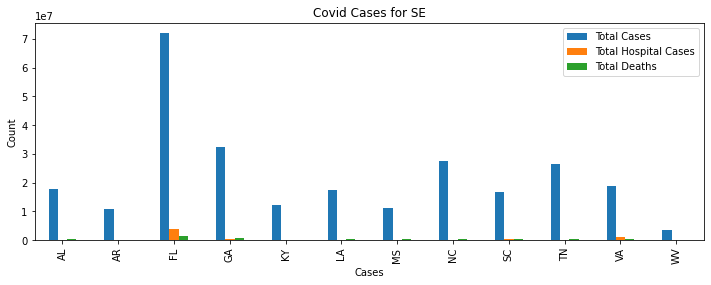

In [59]:
#graph se totals
se_cases_total_df.plot(kind='bar', figsize=(12,4))
plt.title("Covid Cases for SE")
plt.xlabel("Cases")
plt.ylabel("Cases Total")


In [83]:
#chart showing basic stats on dataset
stats = se_cases_total_df.describe()
stats

,Total Cases,Total Hospital Cases,Total Deaths
count,1.200000e+01,1.200000e+01,1.200000e+01
mean,2.226112e+07,4.619522e+05,3.986069e+05
std,1.764113e+07,1.071250e+06,3.199920e+05
min,3.599036e+06,0.000000e+00,6.181800e+04
25%,1.183494e+07,0.000000e+00,2.520535e+05
50%,1.759557e+07,0.000000e+00,3.168160e+05
75%,2.680082e+07,3.394712e+05,4.171632e+05
max,7.204410e+07,3.710396e+06,1.277573e+06


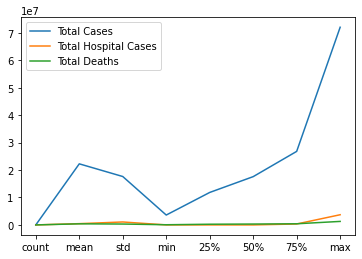

In [85]:
stats.plot()

### 1. Which state  had the least and most positive tests?

In [193]:
# Calculate Aggreagate  data for min and max by state
max_state = se_cases_total_df['Total Cases'].max()
min_state = se_cases_total_df.min()
avg_state =  se_cases_total_df.mean() 

max_state

72044096.0

In [155]:
#iterate through list
# i=0
# for row in se_cases_total_df.iterrows():
#     print(i)
#     print(row)
#     i+=1

### 2. Which group had the lowest and highest survival rate per sate?

In [157]:

# Highest survival rate % = total_cases - total_death/total_cases(same as positive) 
#Get subset of all groups

total_cases = se_cases_total_df['Total Cases'] 
total_deaths = se_cases_total_df['Total Deaths'] 

#Hospital per state
total_hospital_cases = se_cases_total_df['Total Hospital Cases']


state_index = se_cases_total_df.index
state_index



#How many covid cases died in hospital?
total_hospital_cases = se_cases_total_df['Total Hospital Cases']

total_hospital_cases

State
AL          0.0
AR          0.0
FL    3710396.0
GA     279352.0
KY          0.0
LA          0.0
MS          0.0
NC          0.0
SC     519829.0
TN          0.0
VA    1033849.0
WV          0.0
Name: Total Hospital Cases, dtype: float64

In [194]:
#What is the total covid hospital count?
total_hospital_cases_total = se_cases_total_df['Total Hospital Cases'].sum()
total_hospital_cases_total

5543426.0

### Chart hospital cases total  per state

Text(0, 0.5, 'Number of Cases recorded by Hospitals')

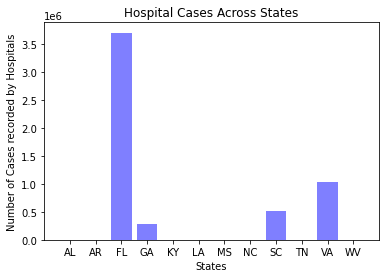

In [171]:
#Display Hospital cases per SE state
x_axis = total_hospital_cases.index #np.arange(len(total_hospital_cases))
plt.bar(x_axis, total_hospital_cases, color='b', alpha=0.5, align="center")
plt.title("Hospital Cases Across States")
plt.xlabel("States")
plt.ylabel("Number of Cases recorded by Hospitals")
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, [total_hospital_cases[0]])

### What percentage of the state's covid cases is reported as Hospital Cases?

In [185]:
#What percentage of hopital cases to totalcases per state ?
total_cases_h = se_cases_total_df['Total Cases'] 
hospital_case_percentage = (total_hospital_cases/total_cases_h) * 100
#hospital_case_percentage = hospital_case_percentage.map("{:,.2f}%".format)

hospital_case_percentage

hosp_percent_df = pd.DataFrame({"Hospital Case Percentage":hospital_case_percentage
                               })
hosp_percent_df

,Hospital Case Percentage
State,
AL,0.000000
AR,0.000000
FL,5.150174
GA,0.859059
KY,0.000000
LA,0.000000
MS,0.000000
NC,0.000000
SC,3.092088


In [186]:
#Calculate Hospital Cases Percentage
hospital_case_percentage_chart_values = hosp_percent_df.loc[hosp_percent_df["Hospital Case Percentage"] > 0]
hospital_case_percentage_chart_values

,Hospital Case Percentage
State,
FL,5.150174
GA,0.859059
SC,3.092088
VA,5.470918


Text(0.5, 1.0, 'Hospital Covid Cases to Total Distribution')

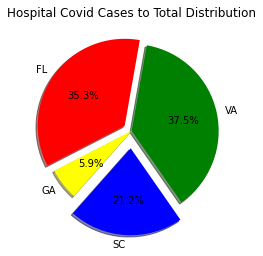

In [191]:
#Display a chart showing results for amount greater than zero
#Generate a pie plot showing the distribution of Hospital cases to total cases.

state_hosp_percent = hospital_case_percentage_chart_values['Hospital Case Percentage'] #.value_counts()

# Labels for the sections of our pie chart
labels = hospital_case_percentage_chart_values.index #["FL", "Male"]

# The y values of each section of the pie chart
sizes = state_hosp_percent  

# The colors of each section of the pie chart
colors = ["red", "yellow", "blue", "green"]

# Tells matplotlib to seperate sections
explode = (0.1, 0, 0.2, 0)


# Generate a pie plot showing the distribution of hospital cases versus total covid cases reported.
plt.pie( sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=80)
plt.title(label="Hospital Covid Cases to Total Distribution")


### 3. Which group had the least or most deaths from testing positive?

In [189]:

#  group with least - find min cases per group overall and group with most - find max per group
#covid_case_totals.groupby('state').iloc[]
maxValuesObj = covid_case_totals.max(axis=1)
maxValuesObj


State
AL    1.919257e+09
AR    1.919257e+09
FL    1.919257e+09
GA    1.919257e+09
KY    1.919257e+09
LA    1.919257e+09
MS    1.919257e+09
NC    1.919257e+09
SC    1.919257e+09
TN    1.919257e+09
VA    1.919257e+09
WV    1.919257e+09
dtype: float64